In [1]:
import numpy as np
import math
import matplotlib.collections as mc
import matplotlib.pylab as pl

In [2]:
random_seed = 1729
np.random.seed(random_seed)
N = 40
x = np.random.rand(N)
y = np.random.rand(N)
points = zip(x,y)
cities = list(points)
itinerary = list(range(0,N))

In [3]:
print(itinerary)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [4]:
def genlines(cities,itinerary):
    lines = []
    for j in range(0,len(itinerary) - 1):
        lines.append([cities[itinerary[j]],cities[itinerary[j + 1]]])
    return lines

In [5]:
def howfar(lines):
    distance = 0
    for j in range(0,len(lines)):
        distance += math.sqrt(abs(lines[j][1][0] - lines[j][0][0])**2 + abs(lines[j][1][1] - lines[j][0][1])**2)
    return distance

In [6]:
totaldistance = howfar(genlines(cities,itinerary))
print(totaldistance)

16.808756356994223


In [7]:
def plotitinerary(cities,itin,plottitle,thename):
    lc = mc.LineCollection(genlines(cities,itin), linewidths=2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.scatter(x, y)
    pl.title(plottitle)
    pl.xlabel('X Coordinate')
    pl.ylabel('Y Coordinate')
    pl.savefig(str(thename) + '.png')
    pl.close()

In [8]:
plotitinerary(cities,itinerary,'Initial Itinerary','initialitinerary')

In [9]:
point = [0.5,0.5]
j = 10
distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)

In [11]:
def findnearest(cities,idx,nnitinerary):
    """Функция для поиска города, ближайшего к заданном"""
    point = cities[idx]
    mindistance = float('inf')
    minidx = - 1
    for j in range(0,len(cities)):
        distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)
        if distance < mindistance and distance > 0 and j not in nnitinerary:
            mindistance = distance
            minidx = j
    return minidx

In [14]:
def donn(cities,N):
    """Функция, которая последовательно находит ближайший город и возвращает полученный маршрут"""
    nnitinerary = [0]
    for j in range(0,N - 1):
        next = findnearest(cities,nnitinerary[len(nnitinerary) - 1],nnitinerary)
        nnitinerary.append(next)
    return nnitinerary

In [15]:
plotitinerary(cities,donn(cities,N),'TSP - Nearest Neighbor','figure3')

In [16]:
print(howfar(genlines(cities,donn(cities,N))))

6.29000579854535


In [17]:
initial_itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,\
                    23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
new_itinerary = [0,1,2,3,4,5,30,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,\
                24,25,26,27,28,29,6,31,32,33,34,35,36,37,38,39]

In [18]:
print(howfar(genlines(cities,initial_itinerary)))
print(howfar(genlines(cities,new_itinerary)))

16.808756356994223
16.791583620116665


In [19]:
def perturb(cities,itinerary):
    """
    Функция, которая вносит небольшое изменение в маршрут,
    сравнивает измененный маршрут с исходным и возвращает более короткий маршрут
    """
    neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
    
    itinerary2 = itinerary.copy()
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    if distance1 > distance2:
        itinerarytoreturn = itinerary2.copy()
        
    return itinerarytoreturn.copy()
    

In [21]:
np.random.seed(random_seed)
itinerary_ps = itinerary.copy()
for n in range(0,len(itinerary) * 50000):
    itinerary_ps = perturb(cities,itinerary_ps)
print(howfar(genlines(cities,itinerary_ps)))

7.37962855396978


In [22]:
temperature = lambda t: 1/(t + 1)

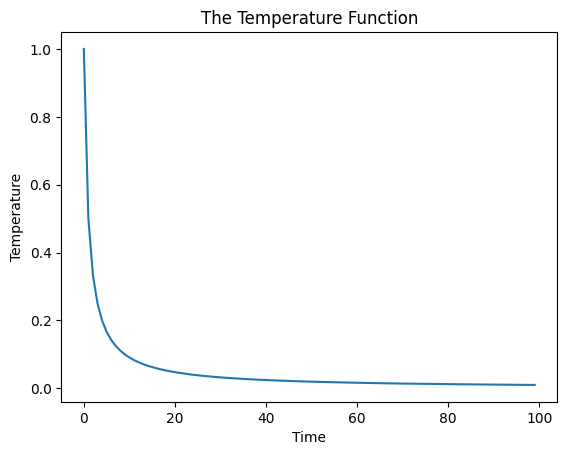

In [23]:
import matplotlib.pyplot as plt

ts = list(range(0,100))
plt.plot(ts, [temperature(t) for t in ts])
plt.title('The Temperature Function')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

In [24]:
def perturb_sa1(cities,itinerary,time):
    """
    Обновленная версия функции perturb(), 
    которая учитывает температуру и случайный фактор
    """
    neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
    
    itinerary2 = itinerary.copy()
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time/1000) + 1)
    
    if (distance2 > distance1 and randomdraw < temperature) or distance1 > distance2:
        itinerarytoreturn = itinerary2.copy()
        
    return itinerarytoreturn.copy()

In [25]:
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,\
            26,27,28,29,30,31,32,33,34,35,36,37,38,39]
np.random.seed(random_seed)
itinerary_sa = itinerary.copy()
for n in range(0,len(itinerary) * 50000):
    itinerary_sa = perturb_sa1(cities,itinerary_sa,n)
    
print('Случайный маршрут: ', howfar(genlines(cities,itinerary)))
print('Поиск с возмущением: ', howfar(genlines(cities,itinerary_ps)))
print('Имитация отжига: ', howfar(genlines(cities,itinerary_sa)))
print('Ближайший сосед: ', howfar(genlines(cities,donn(cities,N)))) 

Случайный маршрут:  16.808756356994223
Поиск с возмущением:  7.37962855396978
Имитация отжига:  5.924388797206357
Ближайший сосед:  6.29000579854535


In [26]:
small = 10
big = 20
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,\
            26,27,28,29,30,31,32,33,34,35,36,37,38,39]
itinerary[small:big] = itinerary[small:big][::-1]
print(itinerary)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [28]:
small = 1
big = 5
itinerary = [0,1,2,3,4,5,6,7,8,9]
tempitin = itinerary[small:big]
del(itinerary[small:big])
np.random.seed(random_seed + 1)
neighborids3 = math.floor(np.random.rand() * (len(itinerary)))

for j in range(0,len(tempitin)):
    itinerary.insert(neighborids3 + j,tempitin[j])

In [30]:
def perturb_sa2(cities,itinerary,time):
    """Использование нескольких методов внесения возмущений в маршрут"""
    neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
    itinerary2 = itinerary.copy()
    randomdraw2 = np.random.rand()
    small = min(neighborids1,neighborids2)
    big = max(neighborids1,neighborids2)
    
    if randomdraw2 >= 0.55:
        itinerary2[small:big] = itinerary2[small:big][:: - 1]
    elif randomdraw2 < 0.45:
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j,tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]
        
    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))
    itinerarytoreturn = itinerary.copy()
    randomdraw = np.random.rand()
    temperature = 1/((time/1000) + 1)
    
    if (distance2 > distance1 and randomdraw < temperature) or (distance1 > distance2):
        itinerarytoreturn = itinerary2.copy()
    
    return(itinerarytoreturn.copy())
    

In [31]:
def perturb_sa3(cities,itinerary,time,maxitin):
    """
    Функция, выполняющая полный процесс имитации отжига
    и возвращающая оптимальный маршрут
    """
    neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
    global mindistance
    global minitinerary
    global minidx
    itinerary2 = itinerary.copy()
    randomdraw = np.random.rand()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1,neighborids2)
    big = max(neighborids1,neighborids2)
    
    if randomdraw2 >= 0.55:
        itinerary2[small:big] = itinerary2[small:big][::- 1 ]
    elif randomdraw2 < 0.45:
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j,tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]
        
    temperature=1/(time/(maxitin/10)+1)
    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))
    itinerarytoreturn = itinerary.copy()
    
    scale = 3.5
    if((distance2 > distance1 and (randomdraw) < (math.exp(scale*(distance1 - distance2)) * temperature)) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
        
    reset = True
    resetthresh = 0.04
    if(reset and (time - minidx) > (maxitin * resetthresh)):
        itinerarytoreturn = minitinerary
        minidx = time
    if(howfar(genlines(cities,itinerarytoreturn)) < mindistance):
        mindistance = howfar(genlines(cities,itinerary2))
        minitinerary = itinerarytoreturn
        minidx = time
    if(abs(time - maxitin) <= 1):
        itinerarytoreturn = minitinerary.copy()
    
    return itinerarytoreturn.copy()
    

In [32]:
def siman(itinerary,cities):
    """
    Функция выполняет полный процесс имитации отжига
    и возвращаетоптимизированный маршрут
    """
    newitinerary = itinerary.copy()
    global mindistance
    global minitinerary
    global minidx
    mindistance = howfar(genlines(cities,itinerary))
    minitinerary = itinerary
    minidx = 0
    
    maxitin = len(itinerary) * 50000
    for t in range(0,maxitin):
        newitinerary = perturb_sa3(cities,newitinerary,t,maxitin)
    
    return newitinerary.copy()

In [33]:
np.random.seed(random_seed)
itinerary = list(range(N))
nnitin = donn(cities,N)
nnresult = howfar(genlines(cities,nnitin))
simanitinerary = siman(itinerary,cities)
simanresult = howfar(genlines(cities,simanitinerary))
print(nnresult)
print(simanresult)
print(simanresult/nnresult)

6.29000579854535
5.324726648610248
0.8465376375076895
